In [1]:
import camb
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

In [2]:
print(f"version of CAMB:, {camb.__version__}")

version of CAMB:, 1.6.2


In [3]:
H0 = 67.4
omega_m = 0.315
omega_ch2 = 0.12
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

In [4]:
help(camb.CAMBparams)

Help on class CAMBparams in module camb.model:

class CAMBparams(camb.baseconfig.F2003Class)
 |  CAMBparams(**kwargs)
 |
 |  Object storing the parameters for a CAMB calculation, including cosmological parameters and
 |  settings for what to calculate. When a new object is instantiated, default parameters are set automatically.
 |
 |  To add a new parameter, add it to the CAMBparams type in model.f90, then  edit the _fields_ list in the CAMBparams
 |  class in model.py to add the new parameter in the corresponding location of the member list. After rebuilding the
 |  python version you can then access the parameter by using params.new_parameter_name where params is a CAMBparams
 |  instance. You could also modify the wrapper functions to set the field value less directly.
 |
 |  You can view the set of underlying parameters used by the Fortran code by printing the CAMBparams instance.
 |  In python, to set cosmology parameters it is usually best to use :meth:`set_cosmology` and
 |  equ

## Option 1: camb.CAMBparams()

In [5]:
pars = camb.CAMBparams()

pars.set_cosmology(H0 = H0, ombh2 = omega_bh2, omch2 = omega_ch2, tau = tau)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [6]:
pars.set_dark_energy(w =-1)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [7]:
results = camb.get_results(pars)
results

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 6250.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.0224
   omch2 = 0.12
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24586829360147697
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   I

## Option 2: camb.set_params()

In [8]:
parms2 = camb.set_params(H0 = 67.4, w =-0.1, cs2 = 0.1)
results2 = camb.get_results(parms2)


In [9]:
results2

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 6250.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.022
   omch2 = 0.12
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24569492503497048
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   In

## Ejercicio 1: Calcular el parametro de Hubble

In [10]:
# Ejercicio 1
H0 = 67.4           #km/s/Mpc
omega_m = 0.315
omegach2 = 0.12
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

# Establecemos los parametros en camb
pars = camb.CAMBparams()
pars.set_cosmology(H0 = H0, ombh2= omega_bh2, omch2=omega_ch2, tau = tau)
results = camb.get_results(pars)

In [11]:
zmax = 3000
Nz = 6000
z = np.linspace(0.0,zmax, Nz)           # z creciente  -> a decreciente
a = 1.0/(1.0+z)

In [12]:
Hz = results.hubble_parameter(z)

In [20]:
a

array([1.00000000e+00, 6.66629626e-01, 4.99958330e-01, ...,
       3.33333352e-04, 3.33277796e-04, 3.33222259e-04], shape=(6000,))

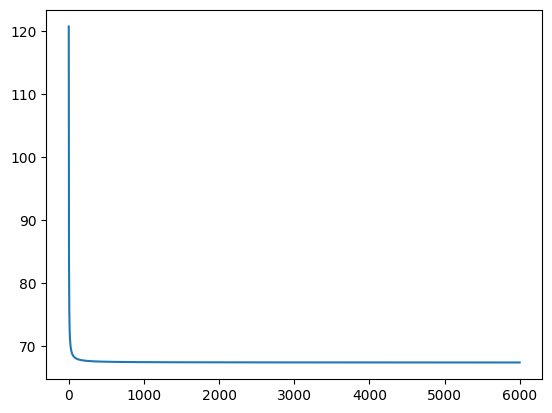

In [19]:
plt.plot(results.hubble_parameter(a))

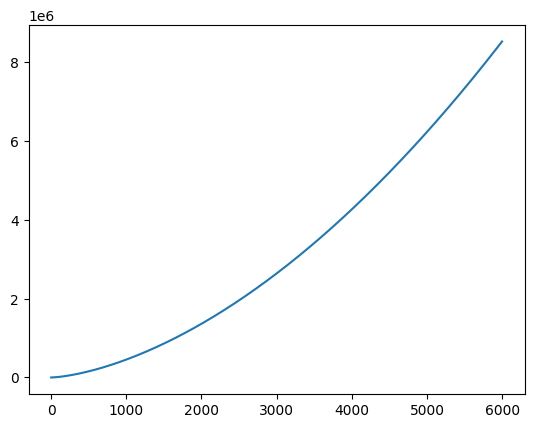

In [13]:
plt.plot(Hz)

### Ejercicio 2:  Calcular a(t)

In [18]:
# Calcular a(t)
# Se necesita pasar H a 1/s por lo que devidimos lo que seria 1 Mpc en Kms
Mpc_to_km = 3.085677581491367e19

H_si = Hz/Mpc_to_km         # 1/s

# Reordenar por a creciente (se necesita para interpolacion)
ord_idx = np.argsort(a)
a_sorted = a[ord_idx]
H_sorted = H_si[ord_idx]

# Interpolar H con repecto a "a"
H_func = interp1d(a_sorted, H_sorted, kind = 'cubic', bounds_error=False, fill_value='extrapolate')

Recordemos que en la clase auxiliar llegamos a una expresion como:

$$\int_{a_{0}}^{a} da \frac{dt}{da} = \frac{1}{H_{0}} \int_{a_{0}}^{a} \left[ \sum_{s} \Omega_{s,0}a^{-1-3\omega}\right]^{-1/2}$$

Ahora calcularemos el lado izquierdo numericamente. Escencialmente $\textbf{calcularemos t a partir de los a's.}$

En este caso, el integrando es $\frac{dt}{da}$, y se integra en $\textbf{a}$.
Como:

$$ H = \frac{\dot{a}}{a} = \frac{da}{a \cdot dt } \Rrightarrow \frac{dt}{da} = \frac{1}{a \cdot H} $$

Por lo que la integral a resolver se vuelve:
$$\int_{a_{0}}^{a} \frac{1}{a \cdot H} da $$

In [19]:
# Definimos el integrando
def dt_da(a_):
    return 1.0/ (a_*H_func(a_))

# Definimos minimo y maximo de a
a_min = a_sorted[0]             # = 1/(1 + zmax)
a_max = 1

# Construnimos array de a's
a_grid = np.linspace(a_min, a_max, 800)

In [20]:
# Hay que definir una lista vacia de t
t_grid = np.empty_like(a_grid)
t0 = 0.0

En este caso vamos a hacer la integral por tramos

In [21]:
# Integramos en tramos
for i in range(len(a_grid)):
    if i == 0:
        t_grid[i] = 0.0

    else:
        # Integrar del a_grid[i-1] a a_grid[i]
        ti, err = quad(dt_da, a_grid[i-1], a_grid[i], epsabs=0, epsrel=1e-6, limit=200)
        t0 += ti
        t_grid[i] = t0 # Sumamos el resultado de la integral a los t anteriores y actualizamos el valor en la lista

Como el resultado se entrega en segundos, pasamos de segundos a Gyr dividiendo por 1 Gyr en segundos

In [22]:
# Pasamos de segundos as Gyr
sec_to_Gyr = 1.0/(3600.0*24.0*365.25*1e9)
t_Gyr = t_grid *sec_to_Gyr

Recordemos dos epocas importantes del universo:

1. **Equivalencia radiacion-Materia:** hace 60 kyr
2. **Equivalencia materia-DE:** hace 9 Gyr

Tambien recordemos que el universo dominado por:
1. **Radiacion:** $a \propto t^{1/2}$
2. **Materia:** $a \propto t^{2/3}$
3. **DE:** $a \propto e^{H_{0}t}$

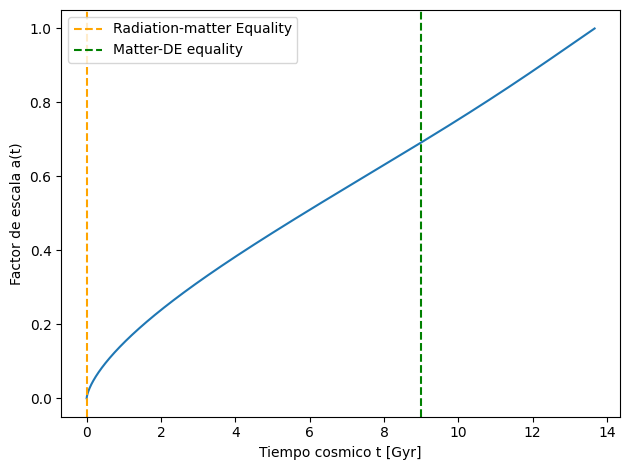

In [27]:
plt.plot(t_Gyr, a_grid)
plt.xlabel("Tiempo cosmico t [Gyr]")
plt.ylabel("Factor de escala a(t)")

plt.axvline(60/10**6, color = 'orange', ls = '--',label = "Radiation-matter Equality")
plt.axvline(9, color = 'green', ls = '--', label = 'Matter-DE equality')

plt.legend()
plt.tight_layout()
plt.show()

In [28]:
# Edad del Universo (desde a_min hasta a=1). Si zmax es lo bastante grande, esto approx edada total
edad_universo_Gyr = max(t_Gyr)
print(f'Edad (aprox) del universo: {edad_universo_Gyr} Gyr (con zmax ={zmax})') 

Edad (aprox) del universo: 13.668070332060882 Gyr (con zmax =3000)


##### Comparemos 

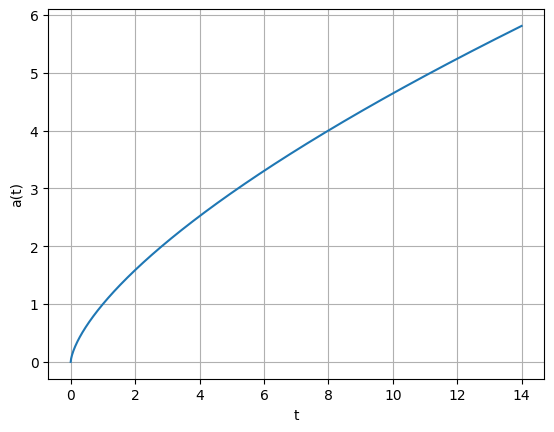

In [30]:
# Si el universo estuviera tan solo dominado por materia

t = np.linspace(0,14,1000)
materia = t**(2/3)

plt.plot(t, materia)
plt.xlabel('t')
plt.ylabel('a(t)')
plt.grid(True)
plt.show()

/tmp/ipykernel_163808/429607620.py:4: RuntimeWarning: overflow encountered in exp
  de = np.exp(67*t)


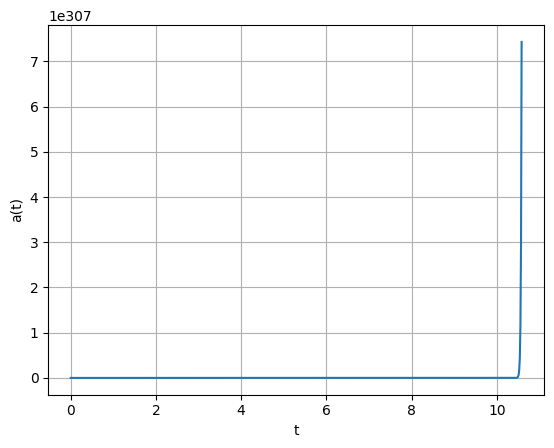

In [31]:
# Si el universo estuviera dominado solo por DE

t = np.linspace(0,14,1000)
de = np.exp(67*t)

plt.plot(t, de)
plt.xlabel('t')
plt.ylabel('a(t)')
plt.grid(True)
plt.show()